In [1]:
import geopandas
import os
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import rioxarray as rxr
import metpy

ImportError: dlopen(/usr/local/lib/python3.9/site-packages/cartopy/trace.cpython-39-darwin.so, 0x0002): Library not loaded: /usr/local/opt/proj/lib/libproj.22.dylib
  Referenced from: /usr/local/lib/python3.9/site-packages/cartopy/trace.cpython-39-darwin.so
  Reason: tried: '/usr/local/opt/proj/lib/libproj.22.dylib' (no such file), '/usr/local/lib/libproj.22.dylib' (no such file), '/usr/lib/libproj.22.dylib' (no such file), '/usr/local/Cellar/proj/9.0.0/lib/libproj.22.dylib' (no such file), '/usr/local/lib/libproj.22.dylib' (no such file), '/usr/lib/libproj.22.dylib' (no such file)

In [30]:
ds = rxr.open_rasterio('/Users/kyle/Downloads/GIOVANNI-g4.timeAvgMap.OMAEROe_003_AerosolOpticalThicknessMW_483_5.20220101-20220104.180W_90S_180E_90N.tif')

In [32]:
vals = ds.values
vals[vals == -32767.0] = np.nan
vals
ds.values = vals

In [ ]:
cfeature.NaturalEarthFeature

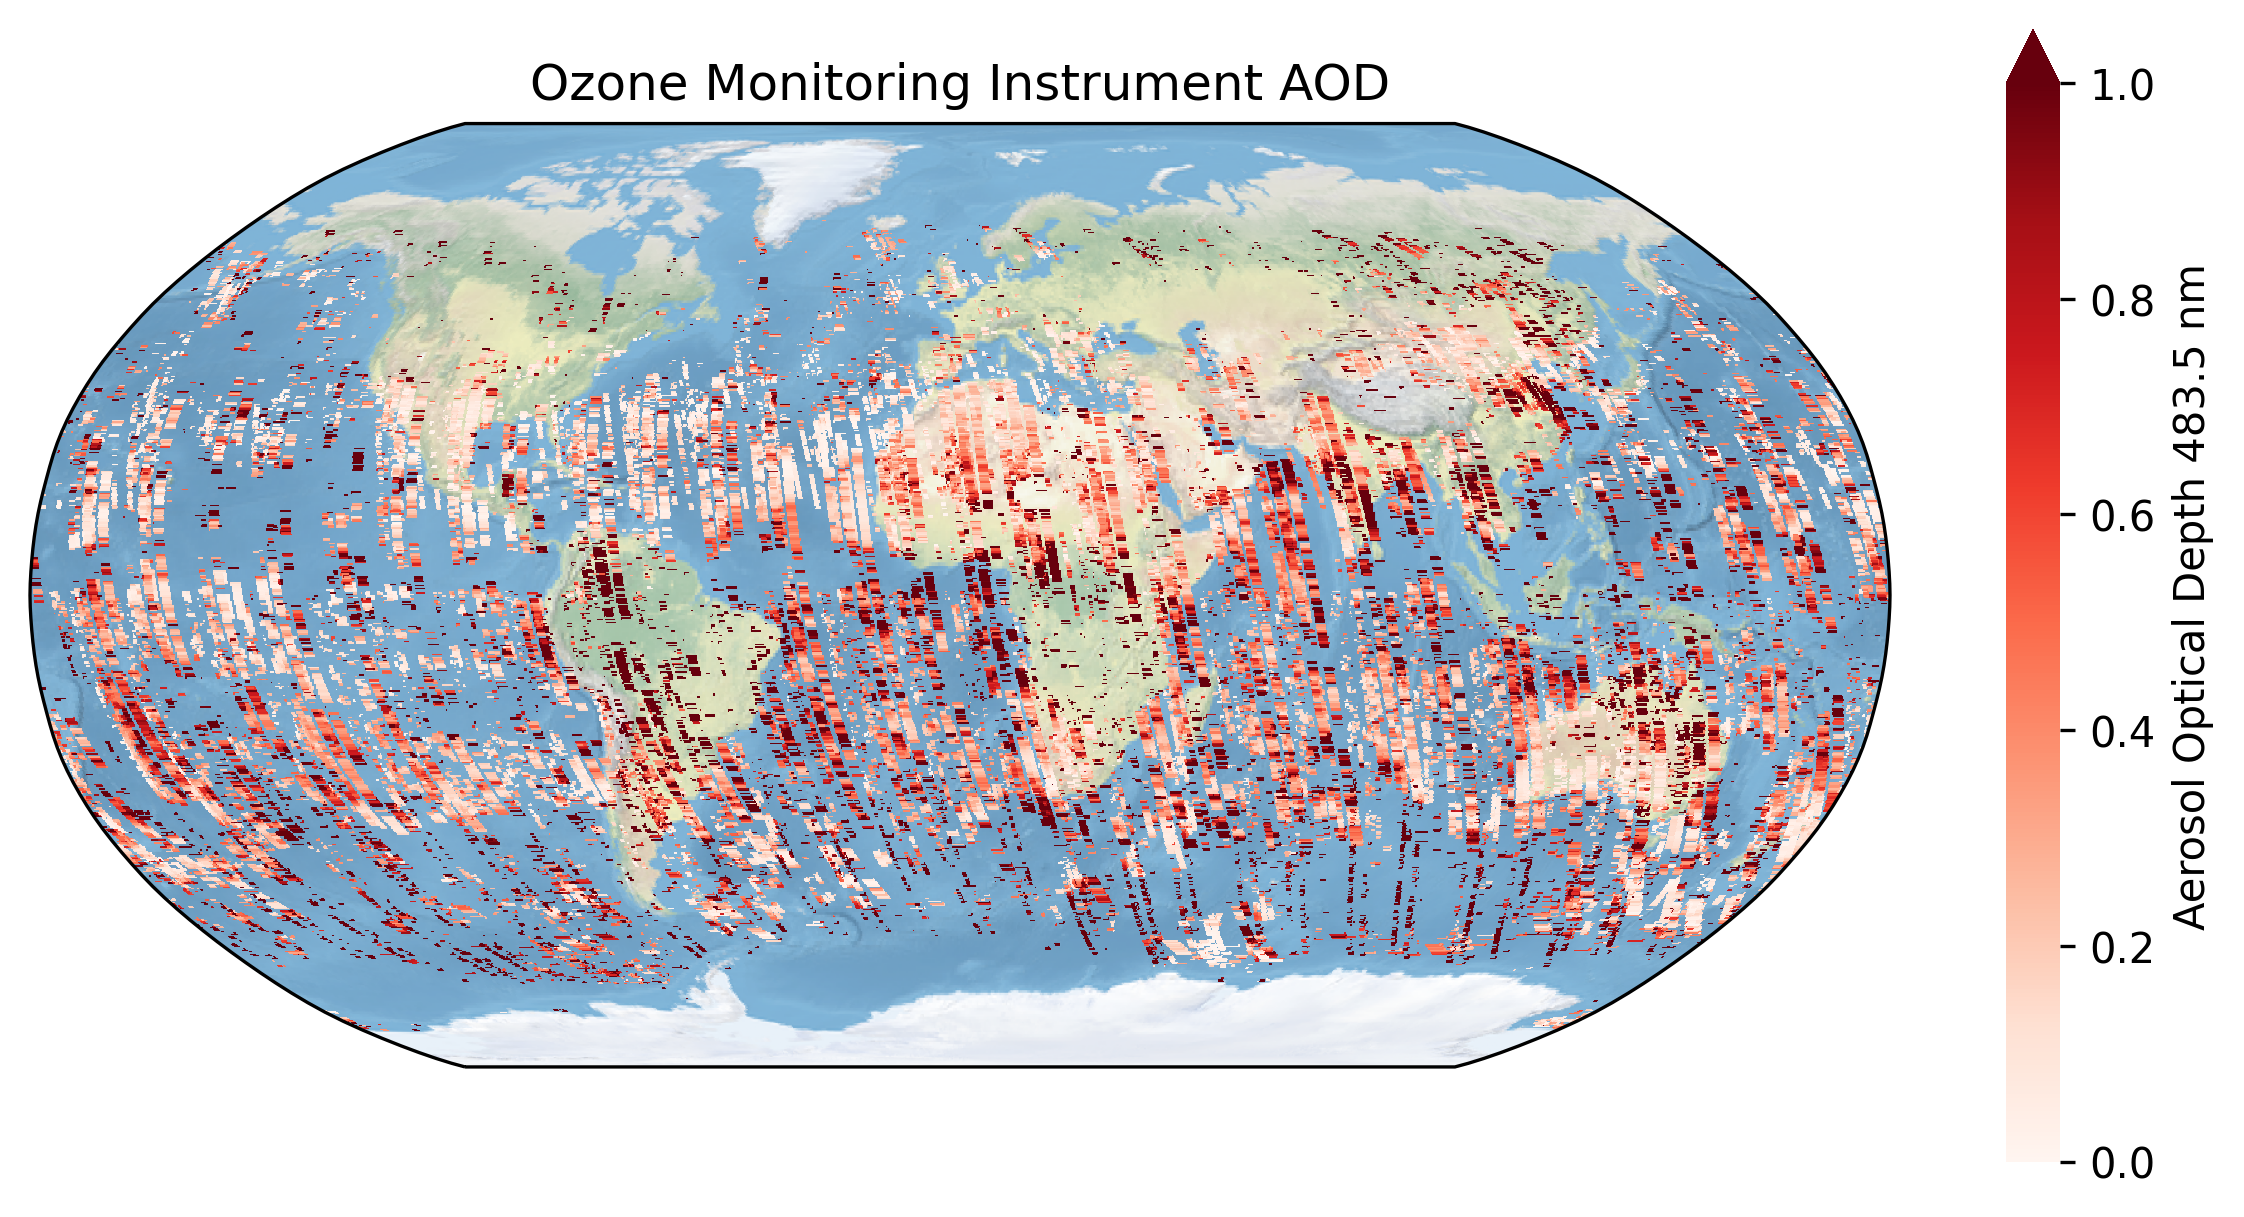

In [85]:
fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(projection=ccrs.Robinson())

ds.plot(ax = ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)

ax.stock_img()

fig.axes[0].collections[0].colorbar.outline.set_linewidth(0)
fig.axes[0].collections[0].colorbar.set_label('Aerosol Optical Depth 483.5 nm')

ax.set_title('Ozone Monitoring Instrument AOD');

fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Funding/NASA FINESST/Figures/AOD.png', format='png')

In [4]:
ctys = geopandas.read_file('data/ne_50m_admin_1_states_provinces.zip')

<AxesSubplot:>

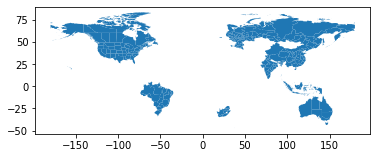

In [5]:
ctys.plot()

In [78]:
CONUS = ctys.query('admin == "United States of America"')
filt = (US['name'] != 'Alaska') & (US['name'] != 'Hawaii')

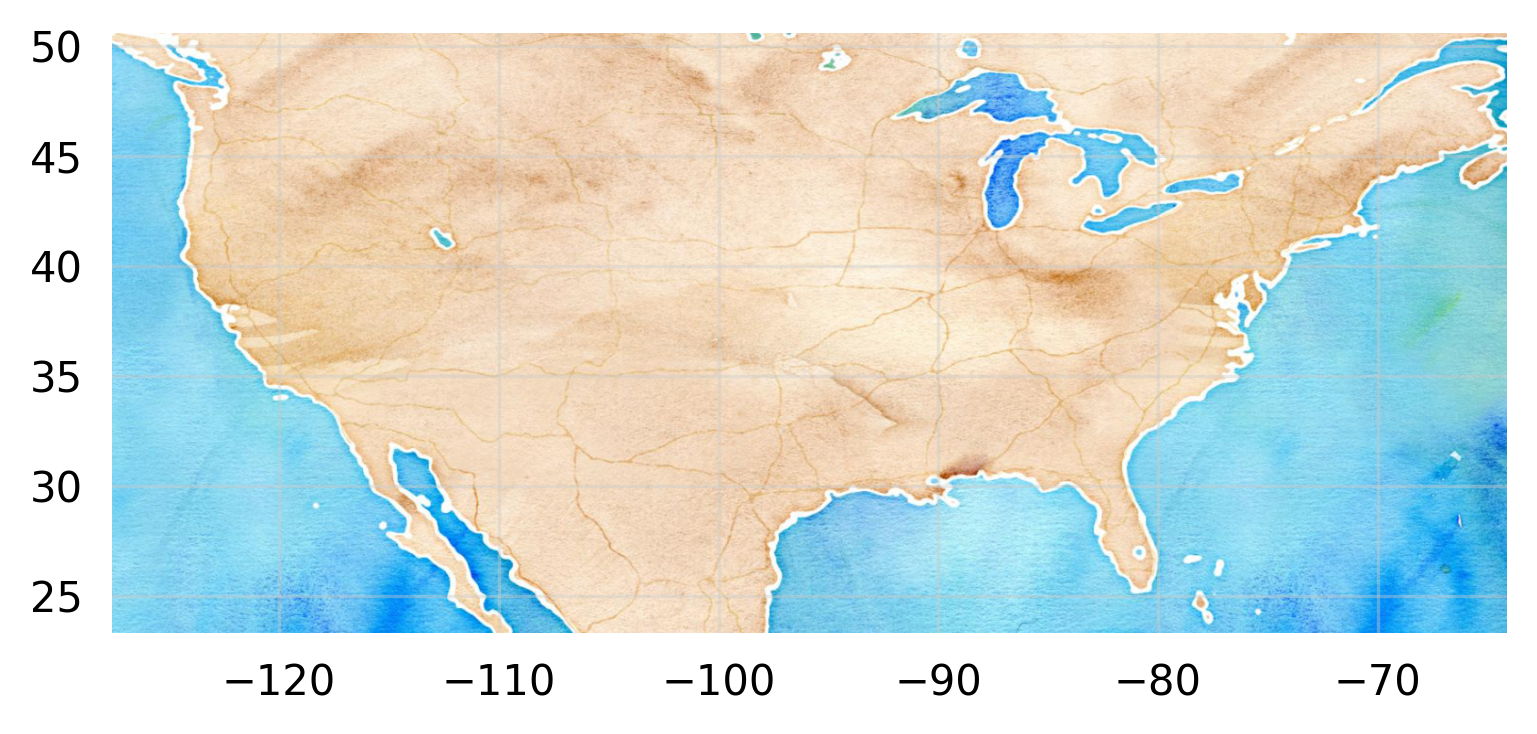

In [107]:
fig, ax = plt.subplots(dpi=300)

CONUS[filt].plot(ax=ax, facecolor='none', edgecolor='none')

cx.add_basemap(ax, 
               crs=CONUS.crs.to_string(), 
               source=cx.providers.Stamen.Watercolor,
               attribution=''
              )

for spine in ['top', 'left', 'bottom', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(color='0.8', alpha=0.4)
ax.tick_params(width=0)

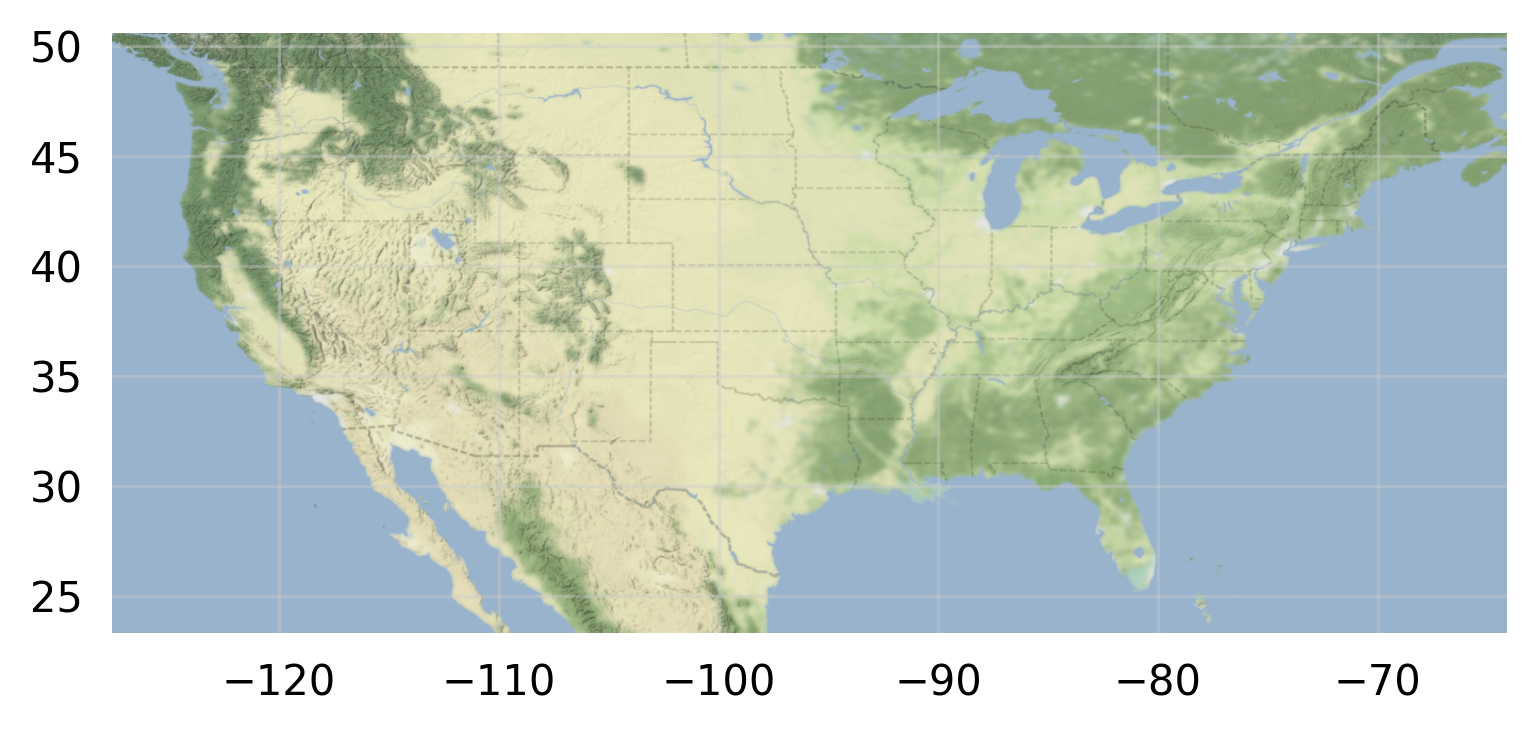

In [79]:
fig, ax = plt.subplots(dpi=300)

CONUS[filt].plot(ax=ax, facecolor='none', edgecolor='none')

cx.add_basemap(ax, 
               crs=CONUS.crs.to_string(), 
               source=cx.providers.Stamen.TerrainBackground,
               attribution=''
              )

for spine in ['top', 'left', 'bottom', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(color='0.8', alpha=0.4)
ax.tick_params(width=0)

In [80]:
if os.path.exists('data/pm.csv'):
    df = pd.read_csv('data/pm.csv')
else:
    import requests
    from urllib.parse import urlencode
    params = {
        'email': 'kyle.shores44@gmail.com',
        'key': 'greenhare83',
        'param': '88101',
        'bdate': '20210317',
        'edate': '20210318',
        'minlat': '24',
        'maxlat': '50',
        'minlon': '-124',
        'maxlon': '-66'
    }
    r=requests.get(f"https://aqs.epa.gov/data/api/sampleData/byBox?{urlencode(params)}")
    data = r.json()['Data']
    df = pd.DataFrame.from_dict(data)
    df['date_local'] = pd.to_datetime(df['date_local'])
    df.to_csv('data/pm.csv')

In [82]:
measurements = df[['latitude', 'longitude', 'date_local', 'sample_measurement']]
measurements

latitude   longitude  date_local  sample_measurement
0      30.497478  -87.880258  2021-03-17                11.5
1      33.284928  -85.803608  2021-03-17                 5.6
2      34.288567  -85.969858  2021-03-17                 2.6
3      33.991494  -85.992647  2021-03-17                 4.9
4      33.553056  -86.815000  2021-03-17                 5.8
...          ...         ...         ...                 ...
34719  36.489470 -118.829150  2021-03-18                 5.0
34720  36.489470 -118.829150  2021-03-18                 8.0
34721  36.489470 -118.829150  2021-03-18                 5.0
34722  36.489470 -118.829150  2021-03-18                 2.0
34723  36.489470 -118.829150  2021-03-18                 4.0

[34724 rows x 4 columns]

In [100]:
groups, locations = map(list, zip(*measurements.groupby(['latitude', 'longitude'])))

In [102]:
geopandas.GeoSeries(groups, crs='EPSG:4326')

<ipython-input-102-4c9b9750f968>:1: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  geopandas.GeoSeries(groups, crs='EPSG:4326')


0       (25.471944, -80.482778)
1       (25.794222, -80.215556)
2        (25.892518, -97.49383)
3       (25.941944, -80.326389)
4       (26.053889, -80.256944)
                 ...           
911    (48.391545, -115.553309)
912      (48.39999, -119.51896)
913    (48.544448, -117.903425)
914       (48.64193, -102.4018)
915    (48.760036, -122.456463)
Length: 916, dtype: object

In [181]:
ds = xr.open_dataset('data/OR_ABI-L2-AODC-M6_G17_s20213350001177_e20213350003550_c20213350006231.nc')

In [182]:
ds

<xarray.Dataset>
Dimensions:                                                 (land_sensor_bands: 3, latitude_bands: 18, num_area_types: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_latitude_band_bounds: 2, number_of_sunglint_angle_bounds: 2, number_of_time_bounds: 2, sea_sensor_bands: 4, x: 2500, y: 1500)
Coordinates:
    t                                                       datetime64[ns] ...
  * y                                                       (y) float32 0.128...
  * x                                                       (x) float32 -0.06...
    y_image                                                 float32 ...
    x_image                                                 float32 ...
    sunglint_angle                                          float32 ...
    retrieval_local_zenith_angle                            float32 ...
    quantitative_local_zenith_angle                         float32 ...
    retrieval_solar_zenith_angle                            float32 ...
    quantitative_solar_zenith_angle                         float32 ...
    aod_product_wavelength                                  float32 ...
  * latitude_bands                                          (latitude_bands) float32 ...
Dimensions without coordinates: land_sensor_bands, num_area_types, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_latitude_band_bounds, number_of_sunglint_angle_bounds, number_of_time_bounds, sea_sensor_bands
Data variables: (12/62)
    AOD                                                     (y, x) float32 ...
    DQF                                                     (y, x) float32 ...
    AE1                                                     (y, x) float32 ...
    AE2                                                     (y, x) float32 ...
    AE_DQF                                                  (y, x) float32 ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    ...                                                      ...
    lat_band_min_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_max_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_mean_aod550_sea                                (latitude_bands) float32 ...
    lat_band_std_dev_aod550_sea                             (latitude_bands) float32 ...
    percent_uncorrectable_GRB_errors                        float32 ...
    percent_uncorrectable_L0_errors                         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-12-01T00:01:17.7Z
    time_coverage_end:         2021-12-01T00:03:55.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        253c131c-911b-4d71-81d0-2060e100ef2f

In [183]:
dat = ds.metpy.parse_cf('AOD')

geos = dat.metpy.cartopy_crs
x = dat.x
y = dat.y

In [184]:
sat_h = ds.goes_imager_projection.perspective_point_height
x2 = ds.x * sat_h
y2 = ds.y * sat_h
ds.coords["x2"] = x2
ds.coords["y2"] = y2

ds["x2"].attrs["long_name"] = "x sweep in crs units (m); x * sat_height"
ds["y2"].attrs["long_name"] = "y sweep in crs units (m); y * sat_height"

ds.attrs["crs"] = geos

X, Y = np.meshgrid(x2, y2)
a = ccrs.PlateCarree().transform_points(geos, X, Y)
lons, lats, _ = a[:, :, 0], a[:, :, 1], a[:, :, 2]

ds = ds.assign_coords({
        "lat":(["y","x"],lats),
        "lon":(["y","x"],lons)
    })
ds.lat.attrs["units"] = "degrees_north"
ds.lon.attrs["units"] = "degrees_east"
# ds.coords["longitude"] = (("y", "x"), lons)
# ds.coords["latitude"] = (("y", "x"), lats)

/usr/local/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


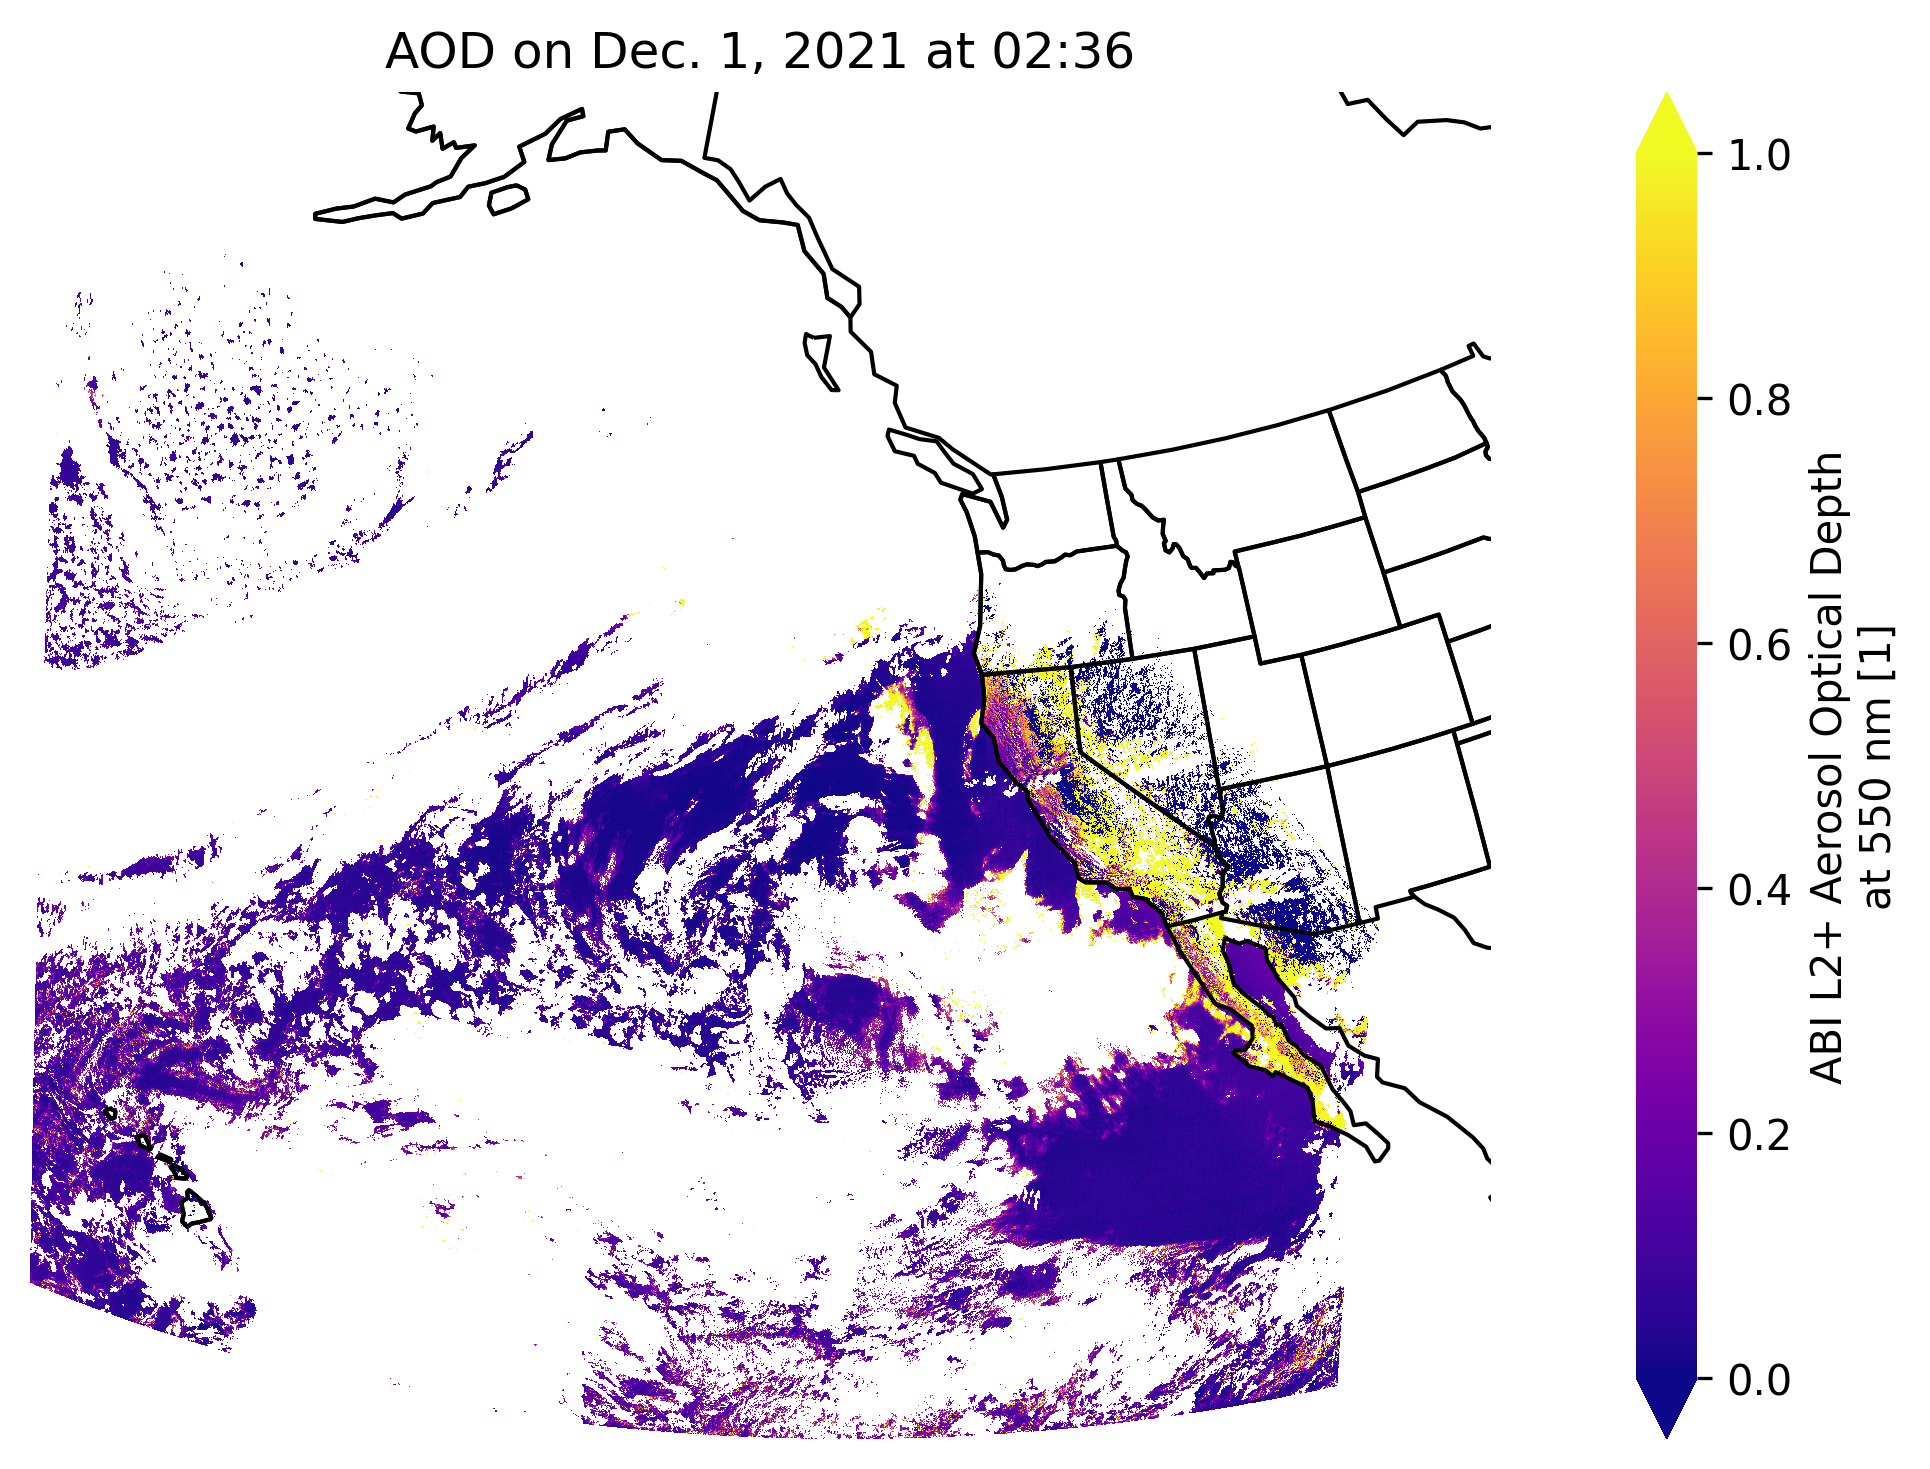

In [185]:
fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(projection=ccrs.Orthographic(-130, 40))

ds.AOD.plot(
    x='lon', y='lat', 
    transform = ccrs.PlateCarree(),
    ax=ax, vmin=0, vmax=1, cmap='plasma'
)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.LAKES)

fig.axes[0].collections[0].colorbar.outline.set_linewidth(0)

# ax.outline_patch.set_visible(False)
for spine in ['top', 'left', 'bottom', 'right']:
    ax.spines['geo'].set_visible(False)
    
ax.set_title("AOD on Dec. 1, 2021 at 02:36")

fig.tight_layout()

fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Funding/NASA FINESST/Figures/AOD.png', 
            format='png', 
            bbox_inches = 'tight',
            pad_inches = 0)

In [117]:
globe_kwargs = dict(
                semimajor_axis=ds.goes_imager_projection.semi_major_axis,
                semiminor_axis=ds.goes_imager_projection.semi_minor_axis,
                inverse_flattening=ds.goes_imager_projection.inverse_flattening,
)
sat_height = ds.goes_imager_projection.perspective_point_height
nadir_lon = ds.geospatial_lat_lon_extent.geospatial_lon_nadir
nadir_lat = ds.geospatial_lat_lon_extent.geospatial_lat_nadir

globe = ccrs.Globe(ellipse=None, **globe_kwargs)

crs = ccrs.Geostationary(
    central_longitude=nadir_lon,
    satellite_height=sat_height,
    globe=globe,
    sweep_axis="x",
)

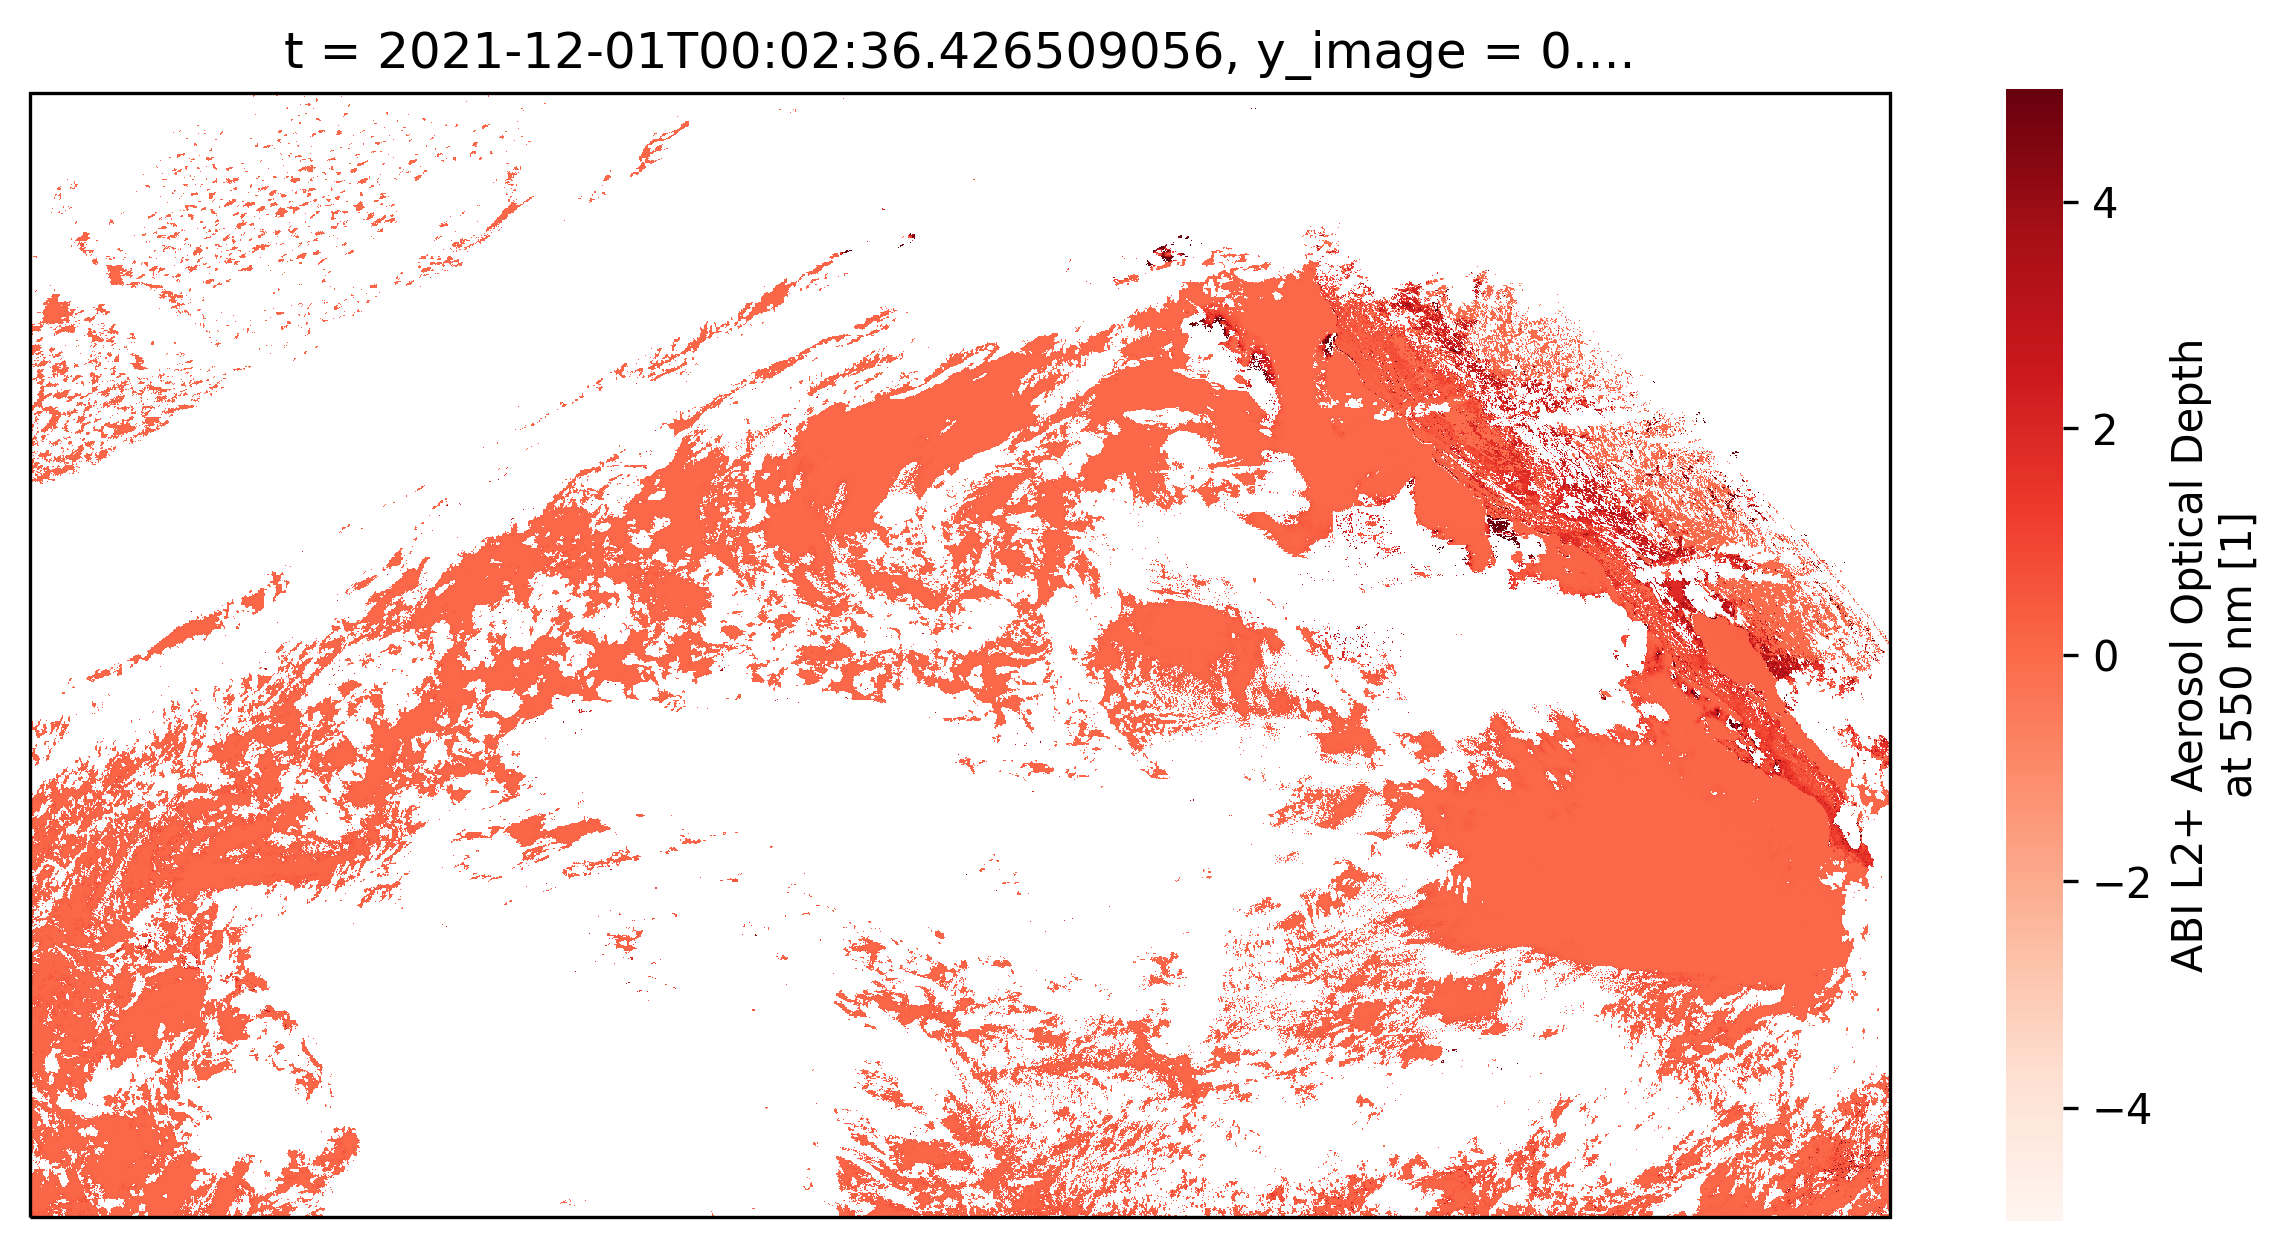

In [118]:
fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(projection=ccrs.Miller())


ds['AOD'].plot(ax=ax, cmap='Reds', transform=crs)

for spine in ['top', 'left', 'bottom', 'right']:
    ax.spines[spine].set_visible(False)
    
if ax.collections:
    ax.collections[-1].colorbar.outline.set_linewidth(0)
    
ax.coastlines();

In [102]:
ax.get_ylim()

(0.044538160630017455, 0.12910427613852052)